<a href="https://colab.research.google.com/github/AyomiUpeksha/Hand-On-Practices-Python-R-/blob/main/Diabetics_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetics Prediction - Supervised Learning

In [4]:
# Importing Packages
from ast import increment_lineno
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import pandas as pd
import io

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns 

1. Importing Data

In [7]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*“Outcome” is the target variable whichis going to be predicted,* 
  *0 >>> No diabetes,*
  *1 >>> diabetes. Of these 768 data points*

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


*There are 268 diabetics Patients among this population.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


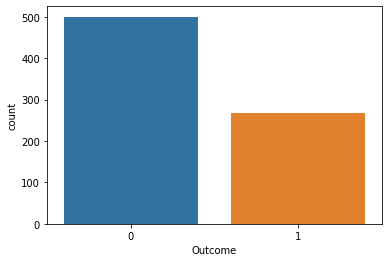

In [11]:
sns.countplot(df['Outcome'],label="Count")

2. Checking the outliers

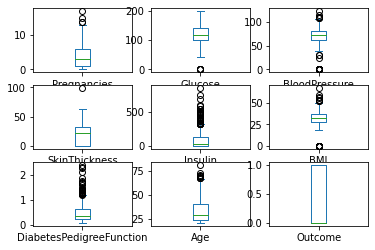

In [12]:
df.plot(kind = "box", subplots = True, layout = (3,3), sharey = False)
plt.show()

3. Data Splitting

In [13]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

3. Building the model 

## Method 1 - KNN Algorithm

3.1 Finding the best possible K value

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, Y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))

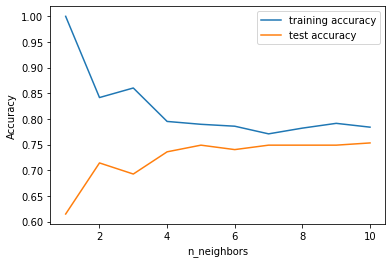

In [17]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

*The best performance is somewhere around 7.*
*This plot suggests that we should choose n_neighbors=7.*

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

4. Testing the model

In [19]:
knn.predict(x_test)[0:5]

array([1, 0, 0, 1, 0])

*It can be seen that the model predicted below for first five patients*
*   *Patient 01 - Have Diabetics*
*   *patient 02 & 03 - No Diabetics*
*   *patient 04 - Have Diabetics*
*   *patient 05  - No Diabetics*

4. Checking the model accuracy

In [20]:
acc_train = knn.score(X_train,Y_train)
acc_test = knn.score(x_test,y_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(acc_train))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(acc_test))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.75


## Method 2 - Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, Y_train)

acc_train = logreg.score(X_train, Y_train)
acc_test  = logreg.score(x_test, y_test)

print("Training set score: {:.3f}".format(acc_train))
print("Test set score: {:.3f}".format(acc_test))

Training set score: 0.764
Test set score: 0.779


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 3 - Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB 

nb_classifier = GaussianNB()  
nb_classifier.fit(X_train, Y_train)

GaussianNB()

In [25]:
acc_train_nb = nb_classifier.score(X_train, Y_train)
acc_test_nb = nb_classifier.score(x_test, y_test)

print("Accuracy on training set: {:.3f}".format(acc_train_nb))
print("Accuracy on test set: {:.3f}".format(acc_test_nb))

Accuracy on training set: 0.767
Accuracy on test set: 0.762


## Method 4 - Decission Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=0)

In [26]:
acc_train = tree.score(X_train, Y_train)
acc_test = tree.score(x_test, y_test)

print("Accuracy on training set: {:.3f}".format(acc_train))
print("Accuracy on test set: {:.3f}".format(acc_test))

Accuracy on training set: 1.000
Accuracy on test set: 0.723


In [27]:
tree1 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [28]:
acc_train = tree1.score(X_train, Y_train)
acc_test = tree1.score(x_test, y_test)

print("Accuracy on training set: {:.3f}".format(acc_train))
print("Accuracy on test set: {:.3f}".format(acc_test))

Accuracy on training set: 0.758
Accuracy on test set: 0.727


*According to the accuracy result training set gie 100% while testing gives dissatisfaction result.This results leads to the overfitting of the model. So It's required to do Pre-Puring (early stopping). For that, we need to specify the max_depth of the decision tree.*

In [29]:
training_accuracy_tree = []
test_accuracy_tree = []
# try n_neighbors from 1 to 10
depth_settings = range(1, 11)
for max_depth in depth_settings:
  # build the model
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy_tree.append(tree.score(X_train, Y_train))
    # record test set accuracy
    test_accuracy_tree.append(tree.score(x_test, y_test))

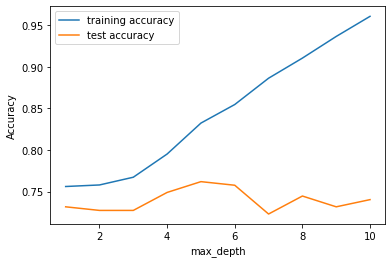

In [30]:
plt.plot(depth_settings, training_accuracy_tree, label="training accuracy")
plt.plot(depth_settings, test_accuracy_tree, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

*We can choose 2 or 3 as max_depth using this plot*

In [31]:
tree1 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree1.fit(X_train, Y_train)
tree2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree2.fit(X_train, Y_train)

acc_train_1 = tree1.score(X_train, Y_train)
acc_test_1 = tree1.score(x_test, y_test)
acc_train_2 = tree2.score(X_train, Y_train)
acc_test_2 = tree2.score(x_test, y_test)

print("Max Depth = 2")
print("Accuracy on training set: {:.3f}".format(acc_train_1))
print("Accuracy on test set: {:.3f}".format(acc_test_1))

print("Max Depth = 3")
print("Accuracy on training set: {:.3f}".format(acc_train_2))
print("Accuracy on test set: {:.3f}".format(acc_test_2))

Max Depth = 2
Accuracy on training set: 0.758
Accuracy on test set: 0.727
Max Depth = 3
Accuracy on training set: 0.767
Accuracy on test set: 0.727


*Let's move on with max_depth = 3*

In [32]:
tree2.predict(x_test)[0:5] # Predicting the first five outcomes for testing test

array([1, 0, 0, 1, 0])

 Identify important predictor variables for the Decision Tree

In [33]:
(tree2.feature_importances_)

array([0.        , 0.59850203, 0.        , 0.        , 0.03153219,
       0.19689768, 0.        , 0.1730681 ])

*It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”.*

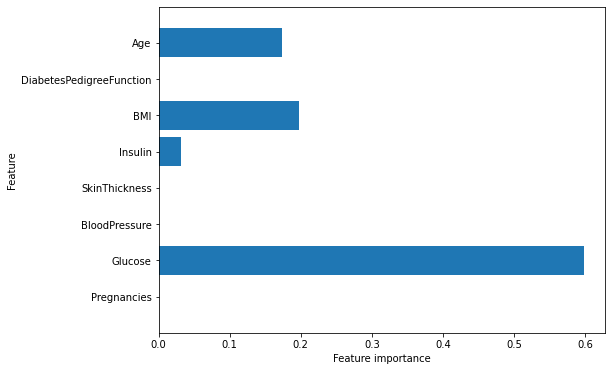

In [34]:
diabetes_features = [x for i,x in enumerate(X_train.columns) if i!=8]

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree2)
plt.savefig('feature_importance')

*Glucose is the most necessary variable*

## Method 5 - Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC # "Support vector classifier"

classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [36]:
acc_train_1 = classifier.score(X_train, Y_train)
acc_test_1 = classifier.score(x_test, y_test)

print("Accuracy on training set: {:.3f}".format(acc_train_1))
print("Accuracy on test set: {:.3f}".format(acc_test_1))

Accuracy on training set: 0.773
Accuracy on test set: 0.784


## Method 6 - Random Forest

Create random forest of 100 of decision trees.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3 , n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)

acc_train = rf.score(X_train, Y_train)
acc_test = rf.score(x_test, y_test)

print("Accuracy on training set: {:.3f}".format(acc_train))
print("Accuracy on test set: {:.3f}".format(acc_test))

Accuracy on training set: 0.795
Accuracy on test set: 0.779


*The random forest gives us an accuracy of 77.9%*

In [38]:
rf.predict(x_test)[0:5] # Predicting the first five outcomes for testing test

array([1, 0, 0, 1, 0])

In [39]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 

y_pred= rf.predict(x_test) 
cm = confusion_matrix(y_test, y_pred)  

print(cm)

[[147  10]
 [ 41  33]]


*(10 + 41 = 51) are incorrect predictions and (147 + 33 = 180) are correct predictions.*

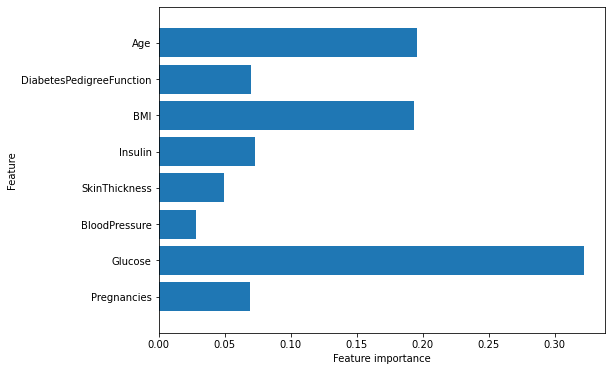

In [40]:
# Identify the important predictor variables
plot_feature_importances_diabetes(rf)

## Method 7 - Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

Accuracy on training set: 0.799
Accuracy on test set: 0.766


In [30]:
lr_list = [0.01, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(learning_rate =learning_rate,random_state=0)
    gb_clf.fit(X_train, Y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy on training set: {0:.3f}".format(gb_clf.score(X_train, Y_train)))
    print("Accuracy on test set: {0:.3f}".format(gb_clf.score(x_test, y_test)))
    print(" ")

Learning rate:  0.01
Accuracy on training set: 0.799
Accuracy on test set: 0.766
 
Learning rate:  0.05
Accuracy on training set: 0.879
Accuracy on test set: 0.775
 
Learning rate:  0.075
Accuracy on training set: 0.909
Accuracy on test set: 0.771
 
Learning rate:  0.1
Accuracy on training set: 0.933
Accuracy on test set: 0.784
 
Learning rate:  0.25
Accuracy on training set: 1.000
Accuracy on test set: 0.758
 
Learning rate:  0.5
Accuracy on training set: 1.000
Accuracy on test set: 0.749
 
Learning rate:  0.75
Accuracy on training set: 1.000
Accuracy on test set: 0.771
 
Learning rate:  1
Accuracy on training set: 1.000
Accuracy on test set: 0.779
 


*Most of models are overfitted except learning rate = 0.01. Hence we can take Gradient Boosting model when the leaning rate = 0.01*

In [31]:
#XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, Y_train)

print("Accuracy on training set: {0:.3f}".format(xgb_clf.score(X_train, Y_train)))
print("Accuracy on test set: {0:.3f}".format(xgb_clf.score(x_test, y_test)))

Accuracy on training set: 0.903
Accuracy on test set: 0.775


*Overfitted Data, Not be useful for considering*

## Method 8 - Deep Learning